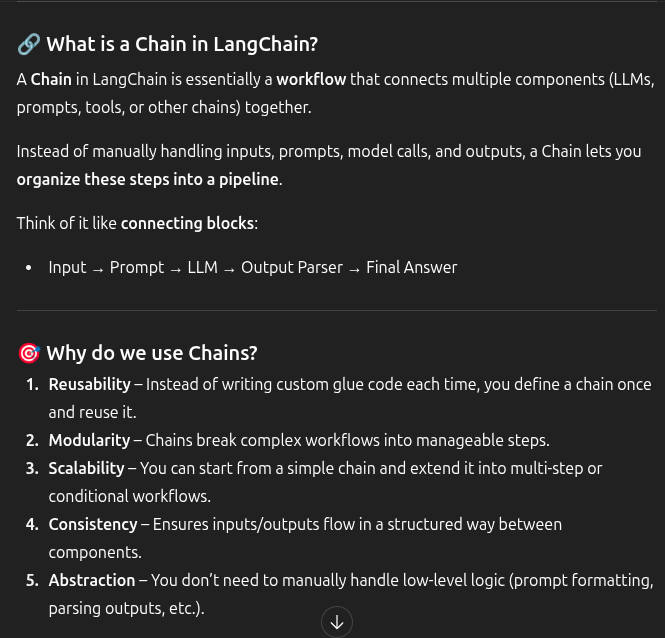

## ⚡ Example (Without Chain vs With Chain)
#### ❌ Without Chain

```bash
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate

llm = OpenAI()
prompt = PromptTemplate(input_variables=["topic"], template="Write a poem about {topic}")

formatted_prompt = prompt.format(topic="friendship")
response = llm(formatted_prompt)
print(response)
```
Here you handle:

- Prompt formatting

- Sending to LLM

- Parsing response

####  ✅ With Chain
```bash
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI

llm = OpenAI()
prompt = PromptTemplate(input_variables=["topic"], template="Write a poem about {topic}")

chain = LLMChain(llm=llm, prompt=prompt)
response = chain.run("friendship")
print(response)
```
Here, the Chain handles everything: input → formatting → calling LLM → output.

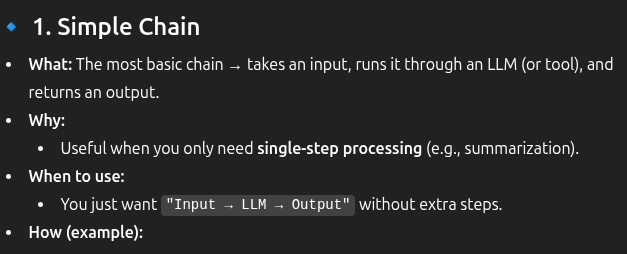

```bash
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()
prompt = PromptTemplate.from_template("Translate this to French: {text}")

chain = LLMChain(llm=llm, prompt=prompt)
print(chain.invoke({"text": "Hello, how are you?"}))

```

✔️ Input → "Hello..." → LLM → "Bonjour..."

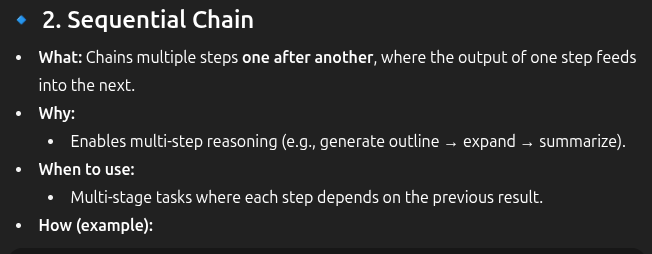

```bash
from langchain.chains import SimpleSequentialChain

chain1 = LLMChain(llm=llm, prompt=PromptTemplate.from_template("Summarize: {text}"))
chain2 = LLMChain(llm=llm, prompt=PromptTemplate.from_template("Translate to French: {summary}"))

overall_chain = SimpleSequentialChain(chains=[chain1, chain2])
print(overall_chain.invoke({"text": "LangChain makes LLM orchestration easy."}))
```
✔️ Flow: Text → Summarize → Translate

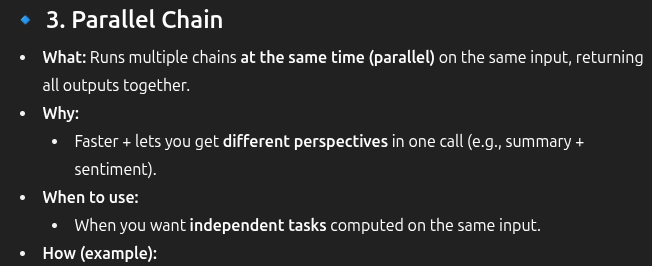

```bash
from langchain.chains import TransformChain, SequentialChain

summary_chain = LLMChain(llm=llm, prompt=PromptTemplate.from_template("Summarize: {text}"))
sentiment_chain = LLMChain(llm=llm, prompt=PromptTemplate.from_template("Sentiment: {text}"))

parallel_chain = SequentialChain(
    chains=[summary_chain, sentiment_chain],
    input_variables=["text"],
    output_variables=["summary", "sentiment"],
)
print(parallel_chain.invoke({"text": "LangChain is powerful but complex."}))
```

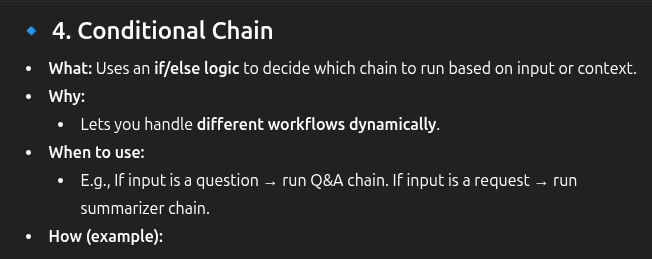

```bash
from langchain.chains import TransformChain

def route(inputs):
    text = inputs["text"]
    if "translate" in text.lower():
        return "translate"
    else:
        return "summarize"

from langchain.chains import ConditionalChain

summarizer = LLMChain(llm=llm, prompt=PromptTemplate.from_template("Summarize: {text}"))
translator = LLMChain(llm=llm, prompt=PromptTemplate.from_template("Translate to French: {text}"))

chain = ConditionalChain(
    input_variables=["text"],
    output_variables=["output"],
    condition=route,
    conditional_chains={"summarize": summarizer, "translate": translator},
)

print(chain.invoke({"text": "Translate this: Hello world"}))

```

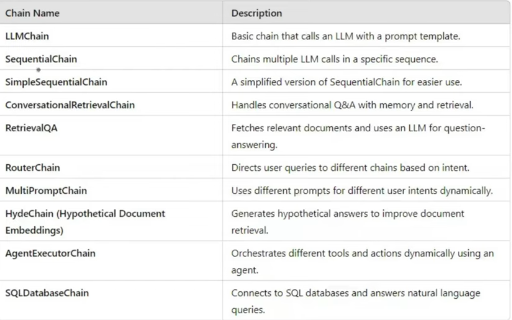